В файле **WIPO-GII_2022.xlsx** содержаться данные по странам о показателях, используемых для расчета Global Innovation Index за 2022 год. 

### В файле следующие переменные:																																
- Country
- Business environment
- Business sophistication index
- Citable documents H-index
- Creative goods and services
- Creative goods exports, % total trade
- Creative outputs index
- Cultural and creative services exports, % total trade
- Domestic market scale, bn PPP
- Ecological sustainability
- Expenditure on education, % GDP
- Firms offering formal training, %
- General infrastructure
- Government effectiveness
- Government's online service
- Graduates in science and engineering, %
- Gross expenditure on R&D, % GDP
- High-tech exports, % total trade
- High-tech imports, % total trade
- High-tech manufacturing, %
- Human capital and research index
- Information and Communications Technology access
- Information and Communications Technology services exports, % total trade
- Information and Communications Technology services imports, % total trade
- Information and Communications Technology use
- Infrastructure index
- Intangible assets
- Joint venture/strategic alliance deals/bn PPP GDP
- Knowledge absorption
- Knowledge and technology outputs index
- Knowledge workers
- Knowledge-intensive employment, %
- Logistics performance
- Market sophistication index
- Mobile app creation/bn PPP GDP
- Online creativity
- PISA scales in reading, maths and science
- Political and operational stability
- Political environment
- Pupil-teacher ratio, secondary
- QS university ranking average score of top 3 universities
- Research and development (R&D)
- Scientific and technical articles/bn PPP GDP
- Software spending, % GDP
- Tertiary education
- Tertiary enrolment, % gross
- University-industry R&D collaboration
- Region
- Region2
- Euro area
- European Union
- OECD members
- Least developed countries
- Income
- High income

Выполните, пожалуйста, задания.

1. Выберите не менее 5 интересующих Вас метрических переменных для последующего проведения кластерного анализа данных. Приведите аргументы в пользу возможности их использования для кластеризации.

In [2]:
!pip install yellowbrick

import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("WIPO-GII_2022.xlsx")
metric_features = df.select_dtypes(exclude=[np.object_])
taken_metrics = metric_features[['Political and operational stability_2022','Firms offering formal training, %_2022','High-tech manufacturing, %_2022','Mobile app creation/bn PPP$ GDP_2022', 'Tertiary enrolment, % gross_2022']]
metric_features.columns.to_frame()
taken_metrics.corr()


,Political and operational stability_2022,"Firms offering formal training, %_2022","High-tech manufacturing, %_2022",Mobile app creation/bn PPP$ GDP_2022,"Tertiary enrolment, % gross_2022"
Political and operational stability_2022,1.000000,0.017641,0.459803,0.355427,0.499535
"Firms offering formal training, %_2022",0.017641,1.000000,0.016697,0.060930,0.049449
"High-tech manufacturing, %_2022",0.459803,0.016697,1.000000,0.354484,0.519702
Mobile app creation/bn PPP$ GDP_2022,0.355427,0.060930,0.354484,1.000000,0.463206
"Tertiary enrolment, % gross_2022",0.499535,0.049449,0.519702,0.463206,1.000000


## Были выбраны следующие метрические признаки:
1. Political and operational stability_2022
2. 'Euro area',
3. 'High-tech manufacturing, %_2022'
4. 'Mobile app creation/bn PPP$ GDP_2022'
5. 'Tertiary enrolment, % gross_2022'

#### Выбраны они были потому что описывают довольно разные сферы государства (политические, экономические и тп) и не особо коррелируют (см. выше)

2. Выберите подходящий алгоритм кластеризации и обоснуйте свой выбор. Определите число кластеров, объясните своё решение. Опишите получившиеся кластеры с помощью описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты. Дайте названия кластерам и обоснуйте их.

Проведем небольшую предобработку данных, так как данные разбиты по разным шкалам, в том числе процентным

In [4]:
from sklearn.preprocessing import StandardScaler #ботал на ИАД
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # заполним NaN средним значением. P.S нанов там 28, не хочется терять столько данных, поэтому добавим чуть чуть "синтетики"
taken_metrics_imputed = imputer.fit_transform(taken_metrics)


scaler = StandardScaler()
taken_metrics_scaled = scaler.fit_transform(taken_metrics_imputed)


Будем использовать иерархический алгоритм кластеризации, так как выборка не очень большая + хочется посмотреть подробнее на то, какие страны друг другу ближе (не хочется смотреть на 5-мерное пространство:))

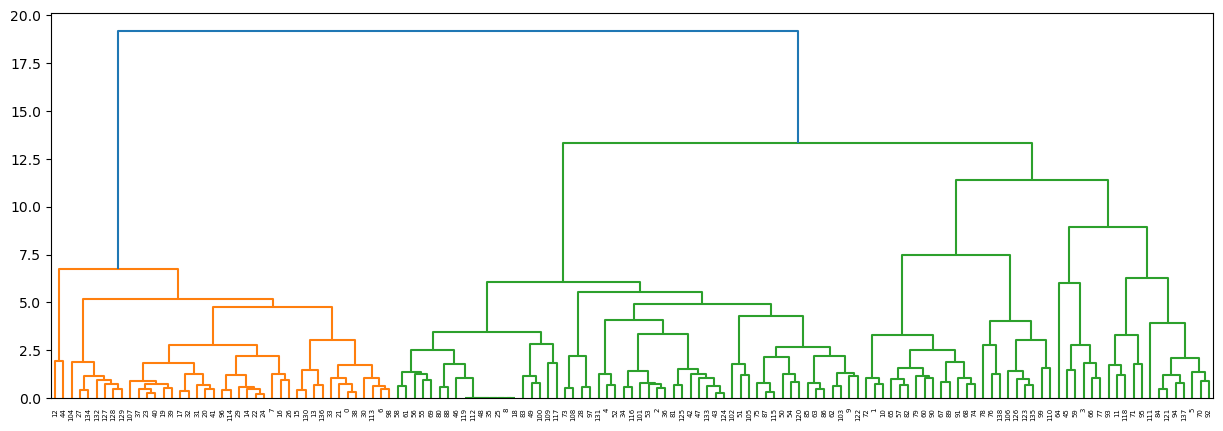

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(taken_metrics_scaled, 'ward'))
plt.show()

Всего имеем 2 кластера. Метод Калински-Харабаша также указывает на два кластера

In [6]:
from sklearn.metrics import calinski_harabasz_score
for k in range (2, 10):
    Z = linkage(taken_metrics_scaled, method='ward', metric='euclidean')
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(taken_metrics_scaled, labels)))

Число кластеров: 2, индекс 49.14980797622116
Число кластеров: 3, индекс 43.89706109835155
Число кластеров: 4, индекс 42.56536935198151
Число кластеров: 5, индекс 39.9488456969609
Число кластеров: 6, индекс 37.32696716204939
Число кластеров: 7, индекс 35.358341141538
Число кластеров: 8, индекс 33.951174116386184
Число кластеров: 9, индекс 33.19802332856886


Выбираем два кластера

In [7]:
Z = linkage(taken_metrics_scaled, method='ward', metric='euclidean') 
labels = fcluster(Z, t=2, criterion='maxclust') 
taken_metrics_scaled = pd.DataFrame(taken_metrics_scaled, 
                                    index=taken_metrics.index, 
                                    columns=taken_metrics.columns) 
taken_metrics_scaled['cluster_labels'] = labels
taken_metrics_scaled


,Political and operational stability_2022,"Firms offering formal training, %_2022","High-tech manufacturing, %_2022",Mobile app creation/bn PPP$ GDP_2022,"Tertiary enrolment, % gross_2022",cluster_labels
0,-0.084842,0.441912,-1.166849,-0.631770,-1.245238,1
1,0.966216,0.879993,2.112609,0.411239,0.611957,2
2,-0.613996,-1.059509,0.027168,-0.584717,-0.278149,2
3,0.966216,-1.167038,0.096682,2.340412,1.237437,2
4,-1.665054,-1.167038,0.902235,-0.592559,0.366577,2
...,...,...,...,...,...,...
134,-0.353044,1.035312,-1.166849,-0.623928,-1.437693,1
135,-0.483520,2.094671,-0.533039,-0.576875,0.780356,2
136,0.176110,-1.167038,-1.166849,-0.631770,-1.437693,1
137,0.705263,-1.167038,1.233452,0.638662,1.352910,2


In [8]:
taken_metrics_scaled.groupby('cluster_labels').mean()

,Political and operational stability_2022,"Firms offering formal training, %_2022","High-tech manufacturing, %_2022",Mobile app creation/bn PPP$ GDP_2022,"Tertiary enrolment, % gross_2022"
cluster_labels,,,,,
1,-0.813069,0.025881,-0.965287,-0.573814,-1.110284
2,0.340162,-0.010828,0.403844,0.240065,0.464507


In [9]:
taken_metrics_scaled[['Political and operational stability_2022', 'Firms offering formal training, %_2022','High-tech manufacturing, %_2022','Mobile app creation/bn PPP$ GDP_2022','Tertiary enrolment, % gross_2022']].mean().to_frame()


,0
Political and operational stability_2022,2.555909e-17
"Firms offering formal training, %_2022",8.945682e-17
"High-tech manufacturing, %_2022",2.555909e-17
Mobile app creation/bn PPP$ GDP_2022,-6.389773e-17
"Tertiary enrolment, % gross_2022",-5.111818e-17


Довольно таки маленькие средние (ну это норм, так как сработал стандарт скейлер). Опишем кластеры:
- Кластер 1: Грубо говоря, страна третьего мира
- Кластер 2: Более развитая страна, где практически все показатели, кроме доли компаний, которые предлагают формальный тренинг

3. Проведите апостериорный анализ данных на основе категориальных переменных датасета. Например, рассмотрите как распределены страны разных регионов по кластерам или в какие кластеры в основном попали страны-члены ОЭСР?

In [110]:
categorial_features = df.select_dtypes(exclude=[np.number])
categorial_features.head(0)

,Country,Region,Region2,Income


Категориальные переменные

### Распределение регионов по кластерам

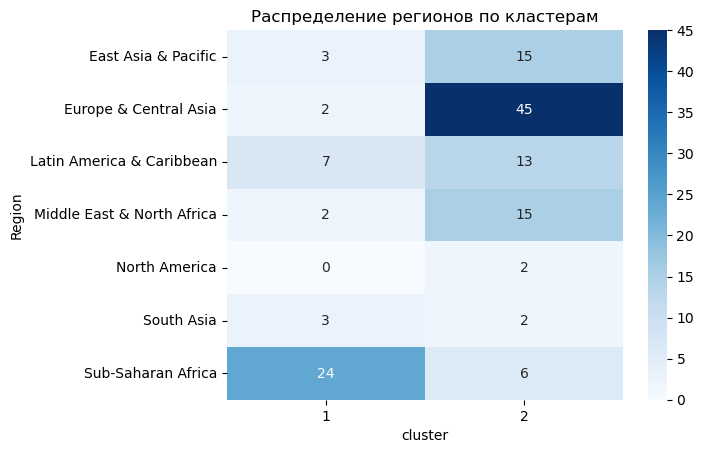

In [111]:
df['cluster'] = taken_metrics_scaled['cluster_labels']
region_countries_cluster = pd.crosstab(df['Region'], df['cluster'])
plt.figure()
sns.heatmap(region_countries_cluster, annot=True, cmap='Blues')
plt.title('Распределение регионов по кластерам')
plt.show()

Видим, что в результате распределения основная масса бедных стран (кластер 1) в Африке и Латинской Америке. А вот масса богатых и развитых стран (кластер 2) в Европе, Восточной Азии, Среднем Востоке и Латинской Америке. Как и предполагалось(

### Распределение стран-членов ОЭСР по кластерам

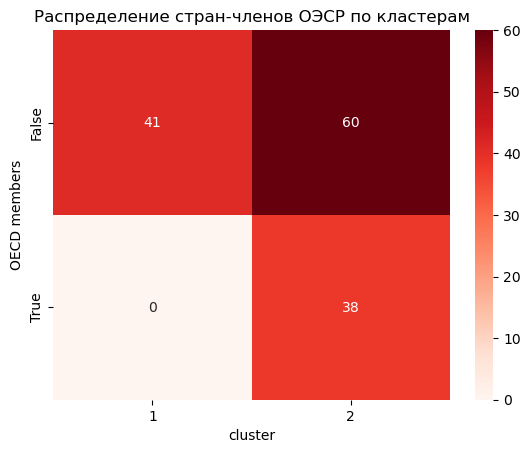

In [112]:
oesr_countries_cluster = pd.crosstab(df['OECD members'] == 1, df['cluster'])
plt.figure()
sns.heatmap(oesr_countries_cluster, annot=True, cmap='Reds')
plt.title('Распределение стран-членов ОЭСР по кластерам')
plt.show()

Видим, что нет ни одной бедной страны в ОЭСР. Все страны, находящиеся в там - богатые. Однако не в ОЭСР есть и развитые страны, и не очень развитые. Вроде нет ничего неожиданного.

### Распределение стран по ВВП по кластерам

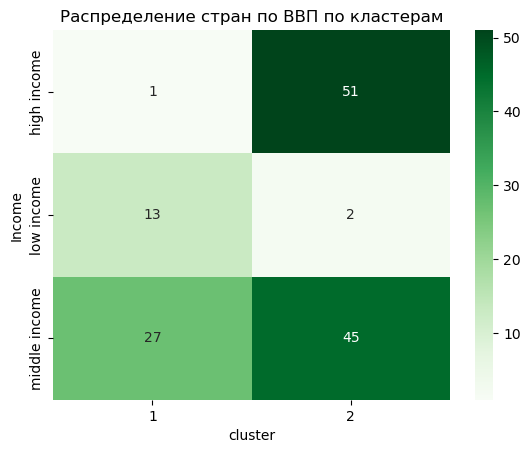

In [113]:
income_countries_cluster = pd.crosstab(df['Income'], df['cluster'])
plt.figure()
sns.heatmap(income_countries_cluster, annot=True, cmap='Greens')
plt.title('Распределение стран по ВВП по кластерам')
plt.show()

Как ни странно, но страны "третьего мира" в основном скорее где-то посередине, хотя и у них есть бедные страны. А вот в развитых странах все понятно - у них средне-высокий ВВП (Income), причем богатых стран более чем половина всех таких стран.

4. Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

#### Вывод
Кластерная структура получилась такой, потому что в выборке больше развитых стран, чем бедных. Между ними не было корреляции и данные были корректными, поэтому кластеры получились в целом довольно логичными по распределению.

Почти все результаты соответствовали ожиданиям, кроме последнего (распределение ВВП).

### Комментарии к заданию и принципам его оценивания:

 - Все пункты задания должны сопровождаться _выполненным_ фрагментом кода.
 - Если Вы получили результаты в виде статистических показателей, таблиц или графиков, при этом никак их не прокомментировали и не сформулировали содержательные выводы на их основе, то работа оценивается в 0 баллов, в этом случае анализ данных не проведён.
 - Если Вы полностью выполнили это задание, то получаете за него 8 баллов (отлично). Для получения более высокой оценки нужно выйти за рамки предложенного задания. В случае с текущим заданием это может быть дополнительное самостоятельное изучение других алгоритмов кластеризации и их применение для анализа данных, или развернутое и глубокое исследование имеющихся данных на основе применения всех пройденных на занятиях алгоритмов кластеризации, сравнение результатов и выбор лучшей кластерной модели с объяснением своего выбора.
 - В этом задании четыре пункта. Первый весит 10%, второй - 50%, третий - 30%, четвертый - 10%.
 - Задание можно выполнять индивидуально или в группе из 2 человек, критерии оценивания при этом не меняются.
 - Если задание выполняется вдвоем, то в Smart LMS работу загружает только один из студентов.
 - В названии загружаемого в Smart LMS файла нужно указать фамилию(ии) автора(ов) работы.

### Этот файл нужно сохранить как Jupyter Notebook (.ipynb) и загрузить в Smart LMS до 23:55 28 октября.

- При сдаче работы до 23:55 29 октября вычитается 1 балл из итоговой оценки. 
- При сдаче работы до 23:55 30 октября вычитаются 2 балла из итоговой оценки. 
- После **23:55 30 октября** работа не принимается.